In [49]:
from pennylane import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
from QCUnet import *
from unitary import U_TTN, U_5
import pandas as pd
import ast
import re 



In [61]:

PATH_D_TRAIN=os.getcwd() + "/data/DataTrain/input_tiles/"
PATH_S_TRAIN=os.getcwd()+"/data/DataTrain/output_matrix/"
PATH_D_TEST=os.getcwd()+"/data/DataTest/input_tiles/"
PATH_S_TEST=os.getcwd()+"/data/DataTest/output_matrix/"

## Experiments visualizations - quantum models

In [27]:

df_archi1 = pd.read_csv('./results/df_exepriments_Archi1.csv')
df_archi2 = pd.read_csv('./results/df_exepriments_Archi2.csv')
df_archi3 = pd.read_csv('./results/df_exepriments_Archi3.csv')
df_archi4 = pd.read_csv('./results/df_exepriments_Archi4.csv')
df_archi5 = pd.read_csv('./results/df_exepriments_Archi5.csv')
# df_classical = pd.read_csv('./results/df_exepriments_classical.csv')
df_classical = pd.DataFrame([])
df_results = pd.concat([df_archi1, df_archi2, df_archi3, df_archi4, df_archi5, df_classical], axis=0)
df_results

,Unnamed: 0,archi,model_name,epochs,batch_size,bands,lr,unitary,opt,loss,train_loss,val_loss,train_iou,train_acc,metrics_by_epoch
0,NaN,Archi1,./mod/quantum/Archi1/\ep9_lr0.001_time_19_44_5...,10,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,tensor(0.2378),tensor(0.2714),0.0,tensor(0.9617),"{1: {'train_loss': tensor(0.5416), 'val_loss':..."


In [80]:
df_results

,Unnamed: 0,archi,model_name,epochs,batch_size,bands,lr,unitary,opt,loss,train_loss,val_loss,train_iou,train_acc,metrics_by_epoch
0,NaN,Archi1,./mod/quantum/Archi1/\ep9_lr0.001_time_19_44_5...,10,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,tensor(0.2378),tensor(0.2714),0.0,tensor(0.9617),"{1: {'train_loss': tensor(0.5416), 'val_loss':..."


In [72]:

def get_best_model(df_result, archi_num, index=0 ):

    if archi_num== 'all':
        df = df_result
    else: 
        df = df_result[df_result['archi']== archi_num]
    if len(df)>0:
        df_sorted = df.sort_values(by =['val_loss', 'train_loss'], ascending=True)
        best_model_infos = df_sorted.loc[index]
        return best_model_infos
    return None
    
def get_best_model_metrics(df_results, archi_num = 'Archi1',  index =0):
    
    best_model_infos = get_best_model(df_results, archi_num, index=index )
    if best_model_infos is None:
        return  pd.DataFrame([]), {}
    else:
        dict_best_model_metrics_by_epoch_string= best_model_infos['metrics_by_epoch']

        # Step 1: Replace tensor(...) with just the numeric value inside it
        cleaned_string = re.sub(r'tensor\(([\d\.e\-]+)\)', r'\1', dict_best_model_metrics_by_epoch_string)

        # Step 2: Convert the cleaned string to a dictionary
        data_dict = ast.literal_eval(cleaned_string)

        # Step 3: Convert the dictionary to a DataFrame
        df = pd.DataFrame.from_dict(data_dict, orient='index')

        # Add an epoch column if needed
        df.reset_index(inplace=True)
        df.rename(columns={'index': 'epoch'}, inplace=True)
    
        return df, best_model_infos


### Train_loss and val_loss by Epoch 

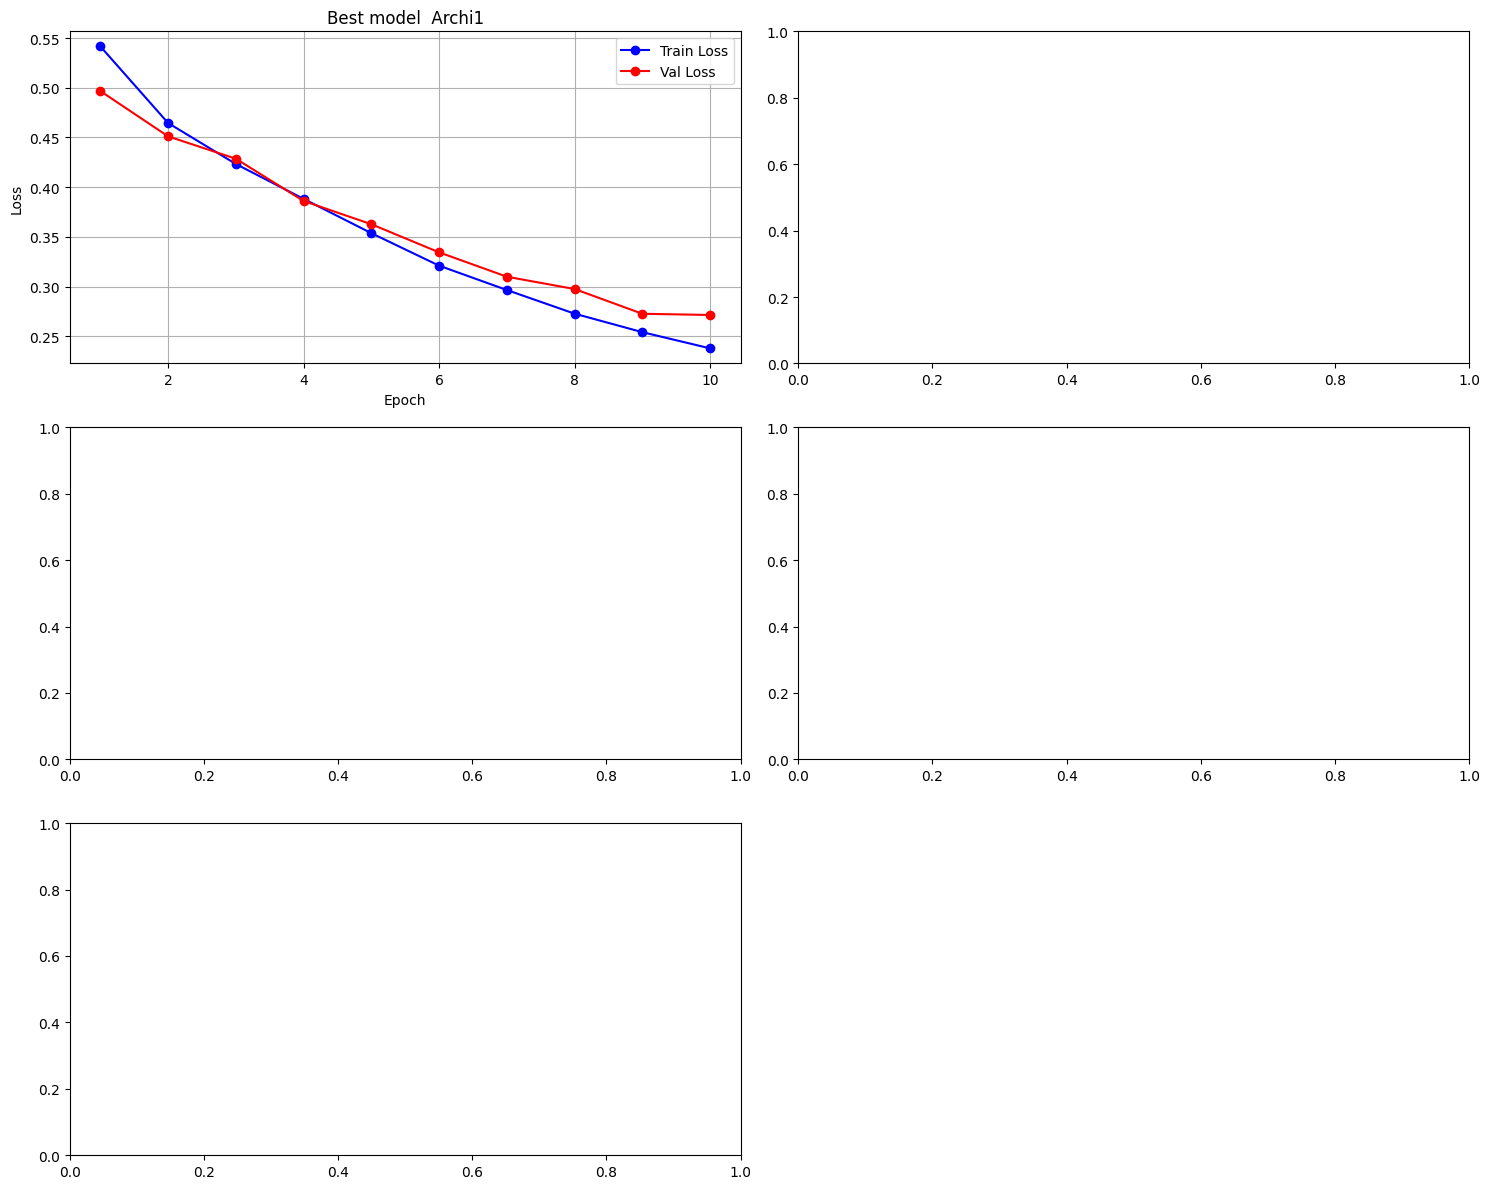

In [73]:
import matplotlib.pyplot as plt


Architetcures =['Archi1', 'Archi2', 'Archi3', 'Archi4', 'Archi4']

# Number of models and layout
num_models = 5
rows, cols = 3, 2  # 3 rows and 2 columns

fig, axs = plt.subplots(rows, cols, figsize=(15, 12))
i=0 


for archi_num in Architetcures :
# Iterate over the models and plot on each subplot
    row, col = divmod(i, cols)  # Calculate row and column index
    df, _ = get_best_model_metrics(df_results, archi_num = archi_num)
    if len(df)>0:
        axs[row, col].plot(df['epoch'], df['train_loss'], marker='o', label='Train Loss', color='blue')
        axs[row, col].plot(df['epoch'], df['val_loss'], marker='o', label='Val Loss', color='red')
        axs[row, col].set_title(f'Best model  {archi_num}')
        axs[row, col].set_xlabel('Epoch')
        axs[row, col].set_ylabel('Loss')
        axs[row, col].grid(True)
        axs[row, col].legend()

    i =i+1
# Hide any unused subplots (in this case, the last one)
if num_models < rows * cols:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.show()



### Accurcy By Epoch

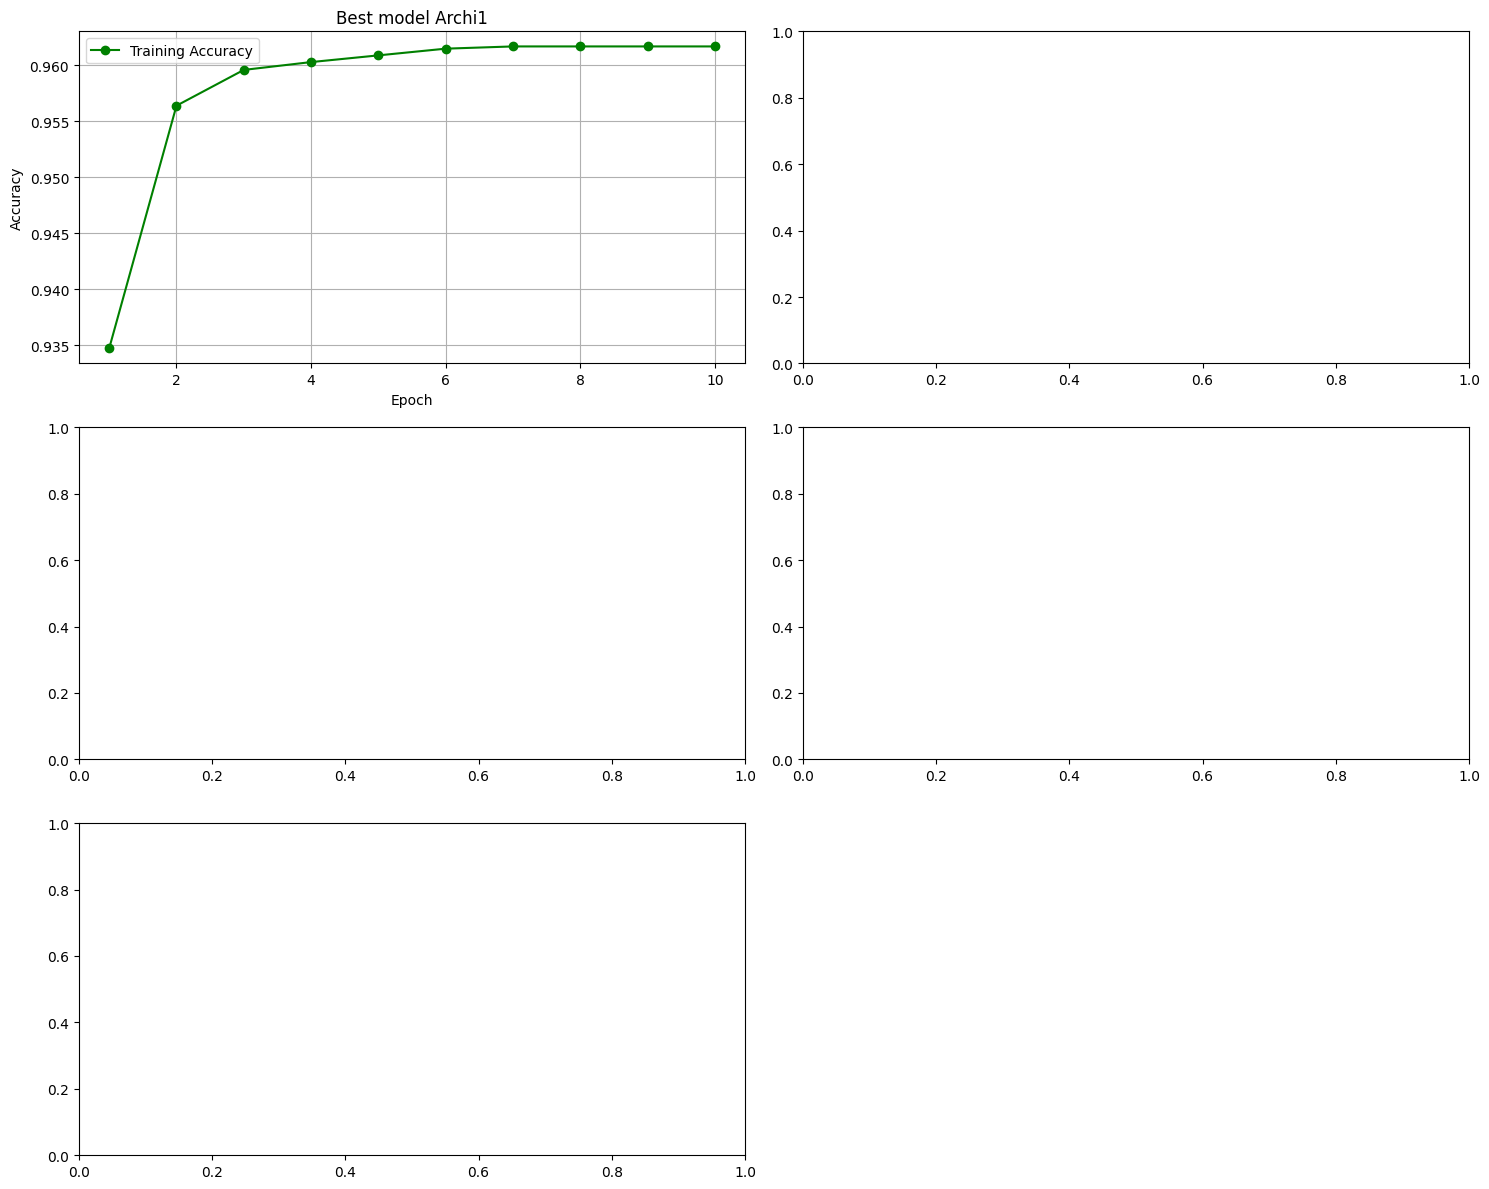

In [74]:
import matplotlib.pyplot as plt


Architetcures =['Archi1', 'Archi2', 'Archi3', 'Archi4', 'Archi4']

# Number of models and layout
num_models = 5
rows, cols = 3, 2  # 3 rows and 2 columns

fig, axs = plt.subplots(rows, cols, figsize=(15, 12))
i=0 
for archi_num in Architetcures :
# Iterate over the models and plot on each subplot
    row, col = divmod(i, cols)  # Calculate row and column index
    df, _ = get_best_model_metrics(df_results, archi_num = archi_num)
    if len(df)>0:
        axs[row, col].plot(df['epoch'], df['train_acc'], label='Training Accuracy', marker='o', color='green')
        axs[row, col].set_title(f'Best model {archi_num}')
        axs[row, col].set_xlabel('Epoch')
        axs[row, col].set_ylabel('Accuracy')
        axs[row, col].grid(True)
        axs[row, col].legend()

    i =i+1
# Hide any unused subplots (in this case, the last one)
if num_models < rows * cols:
    fig.delaxes(axs[-1, -1])

plt.tight_layout()
plt.show()



## Accuracy compraison best models of each architecture 

In [48]:
df_results

,Unnamed: 0,archi,model_name,epochs,batch_size,bands,lr,unitary,opt,loss,train_loss,val_loss,train_iou,train_acc,metrics_by_epoch
0,NaN,Archi1,./mod/quantum/Archi1/\ep9_lr0.001_time_19_44_5...,10,10,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]",0.001,NaN,Adam,BCEWithLogitsLoss,tensor(0.2378),tensor(0.2714),0.0,tensor(0.9617),"{1: {'train_loss': tensor(0.5416), 'val_loss':..."


Index(['Unnamed: 0', 'archi', 'model_name', 'epochs', 'batch_size', 'bands',
       'lr', 'unitary', 'opt', 'loss', 'train_loss', 'val_loss', 'train_iou',
       'train_acc', 'metrics_by_epoch'],
      dtype='object')


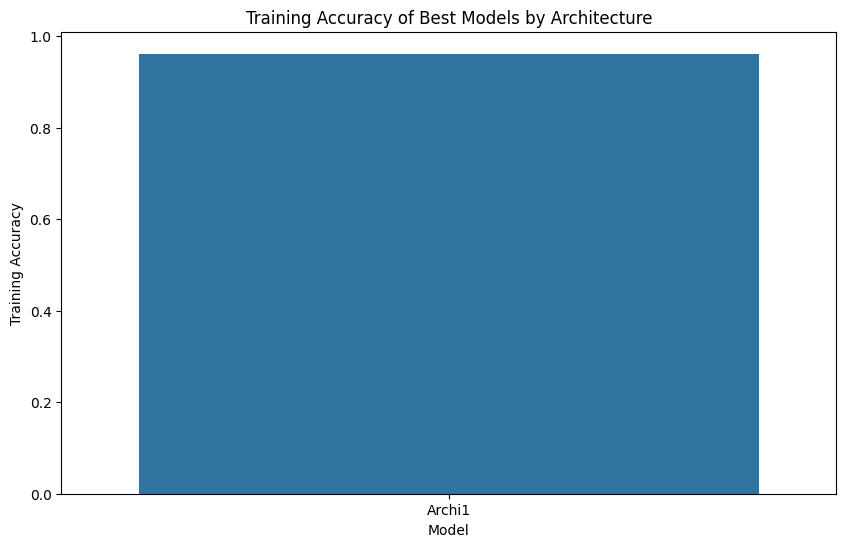

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch 

# Assuming df is your DataFrame

def extract_numeric(tensor_str):
    match = re.search(r'tensor\(([^)]+)\)', tensor_str)
    return float(match.group(1)) if match else None

def get_best_model_metrics_all_architetcures():
    df_all_best = pd.DataFrame([])
    for archi_num in Architetcures :
        _, df_archi = get_best_model_metrics(df_results, archi_num = archi_num)
        if len(df_archi)> 0:
            df_all_best = pd.concat([df_all_best , pd.DataFrame([df_archi])])
    # Convert tensor columns to numeric
    print(df_all_best.columns)
    for col in  ['train_loss', 'val_loss', 'train_iou','train_acc']:
        df_all_best[col] = df_all_best[col].astype(str)
        df_all_best[col] = df_all_best[col].apply(extract_numeric)
    return df_all_best

best_models= get_best_model_metrics_all_architetcures()
# Group by 'archi' and select the row with the minimum 'val_loss' in each group

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=best_models, x='archi', y='train_acc')
sns.barplot(data=best_models, x='archi', y='train_acc')

# Add titles and labels
plt.title('Training Accuracy of Best Models by Architecture')
plt.xlabel('Model')
plt.ylabel('Training Accuracy')

# Show plot
plt.show()


## Load best Model and Make Predictions

In [128]:
import torch
from torchvision import transforms
from PIL import Image
from data import Normalize,Crop, ToTensor, Randomize
from dataset_stats import *
from QCUBottleNeck import UNetWithQBottleNeck

# @TODO to be moved to segment.py 

architectures = {    'Archi1' : { 'quantum_layers' : [True, False, False] ,  'UnetClass' : QCUNet }, 
                     'Archi2': { 'quantum_layers' : [True, True, False] ,   'UnetClass' : QCUNet  },
                     'Archi3' : { 'quantum_layers' : [False, False, True],  'UnetClass' : UNetWithQBottleNeck }, 
                     'Archi4' : { 'quantum_layers' : [True, False, True],  'UnetClass' : QCUNet },  
                     'Archi5': { 'quantum_layers' : [True, True, True],  'UnetClass' : QCUNet  } , 
                     'classical' : {'UnetClass' : UNet}
                    }

def load_model(archi_name ,model_path, unitary , n_channels= 13 ):
    if archi_name == 'classical' : 
        model = UNet(n_channels, n_classes=1, bilinear=True)
    else: 
        quantum_layers= architectures[archi_name]['quantum_layers']
        model = QCUNet(n_channels=n_channels, quantum_layers= quantum_layers ,n_classes=1, 
                                unitary=unitary)
    model.load_state_dict(torch.load(model_path,  map_location=torch.device('cpu')) )
    model.eval()  # Set the model to evaluation mode
    return model 

def read_preprocess_new_image(path, bands ):
    # Define the image transformations
    transform = transforms.Compose([
         Normalize(),
            Crop(),
            ToTensor()
    ])
    
    # Load and transform the image
    imgfile = rio.open(path, nodata = 0)
    imgdata = np.array([imgfile.read(i) for i in bands])
    imgdata = transform(imgdata)
    return imgdata

def calculate_performance_metrices(output_bin, y):
    # derive IoU values
    jaccard = JaccardIndex(task = 'binary').to(device)
    z = jaccard(output_bin, y.unsqueeze(dim=1)).cpu()

    # derive image-wise accuracy for this batch
    acc = Accuracy(task = 'binary').to(device)
    a = acc(output_bin, y[:,None,:,:])

    # derive smoke areas
    area_pred = torch.sum(output_bin, dim = (1, 2, 3))
    area_true = torch.sum(y.unsqueeze(dim=1), dim=(1,2,3))

    #derive area accuracy
    area_dif = torch.sum(torch.square(torch.sub(area_pred, area_true))).cpu()

    return {'jaccard': z, 'accuracy': a, 'area_dif': area_dif  }              


def predict(model, image, threshold =0.35):
    # Make the prediction
    with torch.no_grad():  # Disable gradient computation
        output = model(image)
    #derive segmentation map from prediction
    print('output before sigmoid',  output)
    print('output after sigmoid', torch.sigmoid(output))
    output_bin = torch.round(torch.sigmoid(output))
    output_bin  = (torch.sigmoid(output) >= threshold).int()
    # Return the output
    return output_bin

def predictions(model,  test_images , in_test = True, output_csv_directory = 'predictions/bestModel/'):
    # create test dataset 
    for image in test_images:
        x = image['img'].float()
        output = predict(model, x.unsqueeze(0))
        print(output.shape)
        # save in csv 
        # Convert the output to a NumPy array
        output_np = output.squeeze().cpu().numpy()  # Remove batch dimension and move to CPU

        # Save the output as a CSV file
        filename = os.path.basename(image['imgfile'])
        filename = filename.replace('.tif', '.csv')
        output_csv_file = f'{output_csv_directory}/{filename}'
        pd.DataFrame(output_np).to_csv(output_csv_file, header=False, index=False)
        if  in_test: 
            y=  image['fpt'].float().unsqueeze(dim=0)
            print(y.shape)
            print(calculate_performance_metrices(output,y))


# stations_info_test = get_stations_all_infos_directory(PATH_D_TEST)
# subdataset_test = images_by_country_and_state(stations_info_test)['United States']['Texas']
subdataset_test = dataset_images_train
# print(subdataset_test)
test_images =   create_dataset(
        datadir=PATH_D_TRAIN,
        segdir=PATH_S_TRAIN,
        band=[1,2,3,4,5,6,7,8,9,10,11,12, 13],
        apply_transforms=False, imgfiles = [subdataset_test[2]])
print(test_images.imgfiles)


best_model_path='./mod/quantum/Archi4/big_ep4_lr0.001_time_14_15_30_idd98_val_loss0.3341093957424164_train_loss0.3150314390659332.model'
# model_path='./mod/classical/ep200_lr0.01_bs30_time12_23_46_idd31.model'

model = load_model(archi_name= 'Archi4', model_path=best_model_path, unitary=None)
predictions(model, test_images)
# model

(1,)
(1,)
['w:\\summer school\\Methane leaks\\base research\\code\\Methane-Plume-Segmentation-main\\QCUnet-methane-leaks/data/DataTrain/input_tiles/S2A_MSIL1C_20171031T101141_N0206_R022_T32SKA_20171031T135231_P352_2.tif']
params size torch.Size([1, 4])
params size torch.Size([1, 4])
x6 shape torch.Size([1, 512, 2, 2])
x6_flatten shape: torch.Size([1, 512, 4])
QCNN output shape: torch.Size([1, 512, 4])
qcnn_output reshaped: torch.Size([1, 512, 2, 2])
output before sigmoid tensor([[[[-1.1689, -1.2050, -1.2274,  ..., -1.2604, -1.1136, -0.8444],
          [-1.1550, -1.1983, -1.1997,  ..., -1.3914, -1.1892, -0.9631],
          [-1.1871, -1.1929, -1.2034,  ..., -1.3751, -1.1861, -1.0228],
          ...,
          [-1.2016, -1.1855, -1.1847,  ..., -1.1914, -1.2047, -1.1647],
          [-1.1830, -1.1633, -1.1808,  ..., -1.1922, -1.1800, -1.1489],
          [-1.1685, -1.2013, -1.1836,  ..., -1.1916, -1.1952, -1.1690]]]])
output after sigmoid tensor([[[[0.2371, 0.2306, 0.2266,  ..., 0.2209, 0.24

## Input/Predictions/Output visualizations

./data/DataTrain/tci_tiles/S2A_MSIL1C_20171031T101141_N0206_R022_T32SKA_20171031T135231_P352_0_TCI.tif


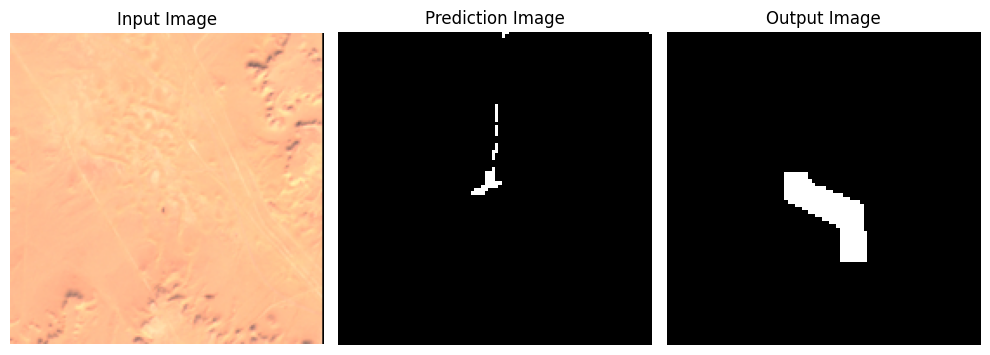

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


input_image_name= 'S2A_MSIL1C_20171031T101141_N0206_R022_T32SKA_20171031T135231_P352_0'

def plot_input_output_prediction(prediction=None ,input_image_name= input_image_name, directory = './data/DataTrain'  ):
    
    input_image_path= f'{directory}/tci_tiles/{input_image_name}_TCI.tif'
    print(input_image_path)
    # Load the input PNG image using rasterio
    input_image = Image.open(input_image_path)

    # Load the output CSV file
    output_csv_path = f'{directory}/output_matrix/{input_image_name}.csv'  # replace with your actual CSV file path
    output_image = pd.read_csv(output_csv_path, header=None).values

    # Create a figure with 1 row and 2 columns for side-by-side plots
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    # Plot the input image (PNG)
    axs[0].imshow(input_image, cmap='gray')
    axs[0].set_title('Input Image')
    axs[0].axis('off')  # Hide the axis

    # Plot the prediction image (CSV)
    axs[1].imshow(prediction, cmap='gray', interpolation='nearest')
    axs[1].set_title('Prediction Image')
    axs[1].axis('off')  # Hide the axis

    # Plot the output image (CSV)
    axs[2].imshow(output_image, cmap='gray', interpolation='nearest')
    axs[2].set_title('Output Image')
    axs[2].axis('off')  # Hide the axis

    # Show the plots
    plt.tight_layout()
    plt.show()

prediction = pd.read_csv('./predictions/bestModel/S2A_MSIL1C_20171031T101141_N0206_R022_T32SKA_20171031T135231_P352_2.csv', header=None).values
plot_input_output_prediction(prediction = prediction)

In [81]:
import os

full_path = 'w:\\summer school\\Methane leaks\\base research\\code\\Methane-Plume-Segmentation-main\\QCUnet-methane-leaks/data/DataTest/input_tiles/S2A_MSIL1C_20181127T173641_N0207_R055_T13SGR_20181127T210219_P606_0.tif'
file_name = os.path.basename(full_path)

print(file_name)


S2A_MSIL1C_20181127T173641_N0207_R055_T13SGR_20181127T210219_P606_0.tif
